In [ ]:
Please follow the below steps to complete the project ( 30 points)
1. Read the dataset and understand the features and target variable. 2 points
2. Encode independent features. 2 points
3. Separate the dependant variable from the rest of the train data 1 point
4. Split the dataset into training and test data ( Take 80:20 ratio). 1 points
5. Apply PCA on the independent features of train data. 1 point
6. Display elbow plot to find out reduced number of dimensions (which covers more than
95% of the variance). 3 points
7. Transform the data using PCA ( select optimum number of PCs). 2 points
8. Apply KMeans algorithm on the above transformed data. 3 points
9. Select optimal number of clusters and form clusters out of the train data. 5 points
10. Create a new column in the train data and populate it with the cluster labels. 2 points
11. Transform the test data using the same PCA object that was fit on the train data. 2 points
12. Use the same kmeans object, assign cluster labels to the test data and store it as a
feature. 2 points
13. Apply any classification model (example: Logistic Regression) on train dataset and
predict target for test dataset. 3 points
14. Check accuracy and confusion matrix. 1 point

In [ ]:
Read the dataset and understand the features and target variable. 2 points

# Note: Updated the dataset manually to include labels. Added a new collumn Class_B to represent the Target variable as Binary. The other Class variable is renamed as Class_C meaning categorical, This will be encoded and used.

In [63]:
import pandas as pd
bank_df=pd.read_csv('Qualitative_Bankruptcy.csv')
print(bank_df.head())
print(bank_df.shape)
print(bank_df.columns)
bank_df.dtypes

   Industrial Risk Management Risk  Financial Flexibility  Credibility  \
0                P               P                      A            A   
1                N               N                      A            A   
2                A               A                      A            A   
3                P               P                      P            P   
4                N               N                      P            P   

  Competitiveness Operating Risk Class_C  Class_B  
0               A              P      NB      1.0  
1               A              N      NB      1.0  
2               A              A      NB      1.0  
3               P              P      NB      1.0  
4               P              N      NB      1.0  
(250, 8)
Index([' Industrial Risk', 'Management Risk', ' Financial Flexibility',
       ' Credibility', 'Competitiveness', 'Operating Risk', 'Class_C',
       'Class_B'],
      dtype='object')


 Industrial Risk           object
Management Risk            object
 Financial Flexibility     object
 Credibility               object
Competitiveness            object
Operating Risk             object
Class_C                    object
Class_B                   float64
dtype: object

# There are 6 features and the Class_b is the new Target variable. Class_B=1 indicates Non_bankruptcy,Class_B=0 indicates bankrupt. All the features are categorical. Class_C will be used for the rest of the analysis

# Encode independent features. 2 points. 

In [64]:
obj_df = bank_df.select_dtypes(include=['object']).copy()
obj_df.head()
cleanup_nums = {"Class_C": {"B": 0, "NB": 1 }}
obj_df.replace(cleanup_nums, inplace=True)# Replacing the categorical Target variable with the binary encoded values.
obj_df["Class_B"]=bank_df.Class_B
obj_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class_C,Class_B
0,P,P,A,A,A,P,1,1.0
1,N,N,A,A,A,N,1,1.0
2,A,A,A,A,A,A,1,1.0
3,P,P,P,P,P,P,1,1.0
4,N,N,P,P,P,N,1,1.0


In [65]:
new_bank_df =obj_df.iloc[:,0:6]
X_df=pd.get_dummies(new_bank_df)

# Separate the dependant variable from the rest of the train data 1 point

In [66]:
X=X_df.values 
y=obj_df["Class_B"]
#print(y)
print(X_df.columns)
new_bank_df.shape

Index([' Industrial Risk_A', ' Industrial Risk_N', ' Industrial Risk_P',
       'Management Risk_A', 'Management Risk_N', 'Management Risk_P',
       ' Financial Flexibility_A', ' Financial Flexibility_N',
       ' Financial Flexibility_P', ' Credibility_A', ' Credibility_N',
       ' Credibility_P', 'Competitiveness_A', 'Competitiveness_N',
       'Competitiveness_P', 'Operating Risk_A', 'Operating Risk_N',
       'Operating Risk_P'],
      dtype='object')


(250, 6)

# Split the dataset into training and test data ( Take 80:20 ratio). 1 points

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(y_train,y_test)

132    1.0
225    0.0
238    0.0
119    1.0
136    1.0
66     1.0
217    0.0
154    0.0
168    0.0
229    0.0
233    0.0
156    0.0
117    1.0
84     1.0
125    1.0
167    0.0
245    0.0
109    1.0
172    0.0
234    0.0
73     1.0
158    0.0
115    1.0
75     1.0
237    0.0
82     1.0
29     1.0
126    1.0
79     1.0
86     1.0
      ... 
242    0.0
187    0.0
191    0.0
129    1.0
37     1.0
157    0.0
235    0.0
1      1.0
52     1.0
149    0.0
130    1.0
151    0.0
103    1.0
99     1.0
116    1.0
87     1.0
202    0.0
74     1.0
214    0.0
210    0.0
121    1.0
249    0.0
20     1.0
188    0.0
71     1.0
106    1.0
14     1.0
92     1.0
179    0.0
102    1.0
Name: Class_B, Length: 200, dtype: float64 142    1.0
6      1.0
97     1.0
60     1.0
112    1.0
181    0.0
197    0.0
184    0.0
9      1.0
104    1.0
200    0.0
216    0.0
236    0.0
240    0.0
67     1.0
224    0.0
194    0.0
15     1.0
177    0.0
24     1.0
247    0.0
19     1.0
114    1.0
68     1.0
176    0.0
45     1.0


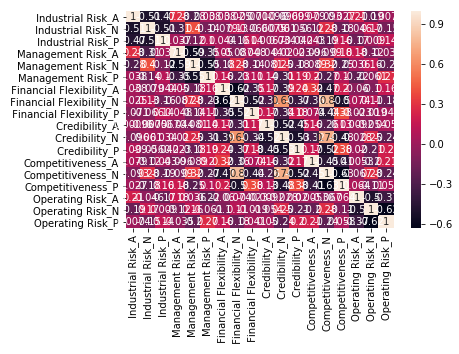

In [68]:
import seaborn as sns
sns.heatmap(X_df.corr(),annot=True)

# Apply PCA on the independent features of train data. 1 point

In [69]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca.fit(X_train) # Creates the new Dimension

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

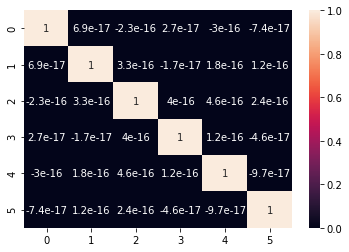

In [70]:
pca_train=pd.DataFrame(pca.transform(X_train)) # Computes the new Co-ordinates
sns.heatmap(pd.get_dummies(pca_train.corr()),annot=True)

# Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 3 points

In [71]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 6)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,971.792000
1,2,737.196131
2,3,665.068758
3,4,607.885312
4,5,562.783190


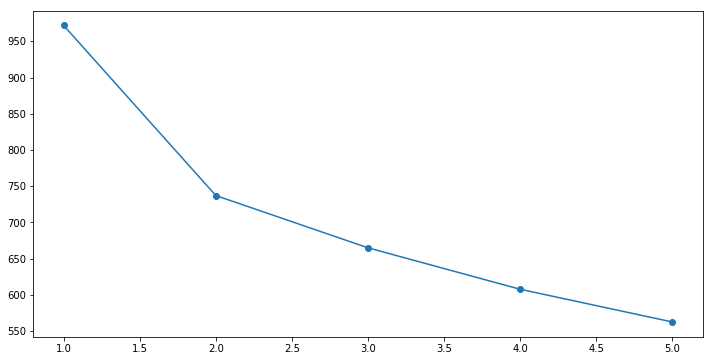

In [67]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Transform the data using PCA ( select optimum number of PCs). 2 points

In [72]:
X_pca=pca.fit_transform(X_train) # Computes the new co-ordinates of the projected values

In [73]:
pca.components_ # Gives the corresponding eigen Vectors

array([[-0.12136012,  0.18529991, -0.06393979, -0.09249814,  0.25145933,
        -0.15896119, -0.22770953,  0.40096734, -0.17325781, -0.15410144,
         0.39239109, -0.23828965, -0.15704241,  0.44237847, -0.28533607,
        -0.03181833,  0.20212143, -0.1703031 ],
       [ 0.46848434, -0.38029207, -0.08819227,  0.39144779, -0.34627316,
        -0.04517463, -0.1005853 ,  0.25242548, -0.15184018, -0.22365843,
         0.19443731,  0.02922112, -0.06151458,  0.11051526, -0.04900069,
         0.1958863 , -0.31173635,  0.11585006],
       [-0.1724765 , -0.28550577,  0.45798226, -0.07417186, -0.17490683,
         0.24907869,  0.10392519,  0.02530344, -0.12922863,  0.1495659 ,
         0.15110818, -0.30067409,  0.20349085,  0.07544386, -0.27893471,
        -0.37027389, -0.02288733,  0.39316122],
       [-0.17540339, -0.1949092 ,  0.37031259,  0.24798552, -0.26565065,
         0.01766513, -0.2258033 , -0.04206296,  0.26786627, -0.08329241,
         0.11733234, -0.03403993, -0.3984733 ,  0.011

In [74]:
cov_matrix=np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)
eigval,eigenvec=np.linalg.eig(cov_matrix)
print(eigval,eigenvec)
eig_vals=eigval
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)


Covariance Matrix 
%s [[ 2.28643216e-01 -1.23115578e-01 -1.05527638e-01  6.05527638e-02
  -7.33668342e-02  1.28140704e-02  1.68341709e-02 -3.01507538e-03
  -1.38190955e-02 -1.75879397e-03 -2.81407035e-02  2.98994975e-02
   2.11055276e-02 -3.36683417e-02  1.25628141e-02  4.14572864e-02
  -5.27638191e-02  1.13065327e-02]
 [-1.23115578e-01  2.28643216e-01 -1.05527638e-01 -6.00502513e-02
   8.74371859e-02 -2.73869347e-02 -2.33668342e-02  3.21608040e-02
  -8.79396985e-03 -1.75879397e-03  1.70854271e-02 -1.53266332e-02
  -2.91457286e-02  7.18592965e-02 -4.27135678e-02 -1.38190955e-02
   5.27638191e-02 -3.89447236e-02]
 [-1.05527638e-01 -1.05527638e-01  2.11055276e-01 -5.02512563e-04
  -1.40703518e-02  1.45728643e-02  6.53266332e-03 -2.91457286e-02
   2.26130653e-02  3.51758794e-03  1.10552764e-02 -1.45728643e-02
   8.04020101e-03 -3.81909548e-02  3.01507538e-02 -2.76381910e-02
  -2.62325058e-17  2.76381910e-02]
 [ 6.05527638e-02 -6.00502513e-02 -5.02512563e-04  2.04798995e-01
  -1.37487437e-

In [75]:
df_bank_train.head()

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P,y_train
0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1.0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0.0
2,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0.0
3,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1.0
4,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1.0


In [76]:
y_train1 = y_train.reset_index()

In [77]:
y_train1['Class_B'].head()

0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Class_B, dtype: float64

In [78]:
df_bank_train=pd.DataFrame(X_train,columns=X_df.columns)
df_bank_train['y_train']=y_train1['Class_B']
print(df_bank_train)
df_bank_train.shape


      Industrial Risk_A   Industrial Risk_N   Industrial Risk_P  \
0                     1                   0                   0   
1                     0                   0                   1   
2                     1                   0                   0   
3                     0                   0                   1   
4                     0                   0                   1   
5                     0                   0                   1   
6                     0                   1                   0   
7                     0                   0                   1   
8                     1                   0                   0   
9                     1                   0                   0   
10                    0                   1                   0   
11                    0                   1                   0   
12                    0                   0                   1   
13                    1                   0                   

(200, 19)

# Select optimal number of clusters and form clusters out of the train data. 5 points

In [79]:
from sklearn.cluster import KMeans
colnames = ["PC1","PC2","PC3","PC4","PC5","PC6"]
# Number of clusters
kmeans = KMeans(n_clusters=2,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X_train)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn
#X["clusters"] = prediction

Centroid values
sklearn
[[ 2.71028037e-01  4.85981308e-01  2.42990654e-01  2.05607477e-01
   6.91588785e-01  1.02803738e-01  3.73831776e-02  9.62616822e-01
  -4.44089210e-16  1.49532710e-01  8.22429907e-01  2.80373832e-02
   3.73831776e-02  9.53271028e-01  9.34579439e-03  2.24299065e-01
   5.98130841e-01  1.77570093e-01]
 [ 3.63636364e-01  2.58741259e-01  3.77622378e-01  3.28671329e-01
   3.14685315e-01  3.56643357e-01  4.89510490e-01  1.11888112e-01
   3.98601399e-01  4.26573427e-01  4.19580420e-02  5.31468531e-01
   3.63636364e-01  6.99300699e-03  6.29370629e-01  2.30769231e-01
   3.49650350e-01  4.19580420e-01]]


# Create a new column in the train data and populate it with the cluster labels. 2 points

In [80]:
PCA_df = pd.DataFrame(X_pca, columns= colnames)
PCA_df["group"] = labels
print(PCA_df.head())
PCA_df.shape
#df_bank_train["PC1"]=PCA_df.PC1
df_bank_train

        PC1       PC2       PC3       PC4       PC5       PC6  group
0 -1.104169  0.665130 -0.844422  0.505153 -0.637144  1.148632      1
1  1.379580 -0.155013  0.543141  0.543288  0.187033  0.039366      0
2  0.365247  0.284666  0.335125  0.080263 -1.006332 -0.363860      0
3 -1.251697 -0.408206  0.872722  0.706244  0.475422  0.635536      1
4 -0.925465 -0.456425 -0.001504  0.472180  1.462773  0.329419      1


,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P,y_train
0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1.0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0.0
2,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0.0
3,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1.0
4,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1.0
5,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1.0
6,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0.0
7,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0.0
8,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0.0
9,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0.0


In [ ]:
Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 2 points

In [81]:
df_bank_test=pd.DataFrame(X_test,columns=X_df.columns)
y_test1 = y_test.reset_index()
df_bank_test['y_test1']=y_test1['Class_B']
df_bank_test["PC1"]=PCA_df.PC1
df_bank_test

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P,y_test1,PC1
0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1.0,-1.104169
1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1.0,1.379580
2,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1.0,0.365247
3,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1.0,-1.251697
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1.0,-0.925465
5,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0.0,-0.266317
6,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0.0,0.912438
7,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0.0,1.379580
8,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1.0,0.978203
9,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1.0,0.978203


# Apply any classification model (example: Logistic Regression) on train dataset and predict target for test dataset. 3 points

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
df_test_predict=pd.DataFrame(X_test,columns=X_df.columns)
#print(y_test.shape)
#print(y_test)
df_test_predict["y_predict"]=y_pred
df_test_predict["y_test1"]=y_test1['Class_B']
df_test_predict

C:\Users\Shivak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 1.00


,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P,y_predict,y_test1
0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1.0,1.0
1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1.0,1.0
2,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1.0,1.0
3,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1.0,1.0
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1.0,1.0
5,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0.0,0.0
6,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0.0,0.0
7,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0.0,0.0
8,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1.0,1.0
9,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1.0,1.0


# Check accuracy and confusion matrix. 1 point

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

[[21  0]
 [ 0 29]]
Accuracy of logistic regression classifier on test set: 1.00


# Conclusion: Logistic regression is showing an accuracy of 100% . There seems to be no need for the new features btained using the principal component Analysis. There is no change in the accuracy with the addition of new feature. The predicted value y_predict and the original class value for the test set y_test are identical as shown above.